# Liberías

In [ ]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree,svm,neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import RMSprop
from keras.constraints import maxnorm

In [ ]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.Session(config=config)
set_session(sess)

Device mapping:



# Lectura de datos

In [ ]:
data = pd.read_csv('C:/Users/Ceiec04/Desktop/Prediccion_Alertas_Alimentarias/Datasets/splited_RASFF_DATA_16092019.csv', sep=';', 
                header=0, index_col = 0)
data ['DATE_CASE'] = data ['DATE_CASE'].astype(str)
data ['HAZARDS_CAT'] = data ['HAZARDS_CAT'].astype(str)
data = data.sample(frac = 1)
train  = data
train

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
141164,2004-01-26,Belgium,crustaceans and products thereof,food,undecided,re-dispatch,,pathogenic micro-organisms,Bangladesh,,Belgium
64738,2014-06-19,Poland,"dietetic foods, food supplements, fortified foods",food,undecided,withdrawal from the market,distribution to other member countries,novel food,United States,Latvia,
136524,2005-01-17,Lithuania,fruits and vegetables,food,undecided,return to consignor,distribution restricted to notifying country,pesticide residues,Iran,Lithuania,
79326,2012-12-18,Finland,fruits and vegetables,food,serious,recall from consumers,distribution to other member countries,pathogenic micro-organisms,China,Greece,
29802,2017-09-27,Poland,"nuts, nut products and seeds",food,not serious,re-dispatch,product not (yet) placed on the market,foreign bodies,Vietnam,,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...
92565,2011-07-08,United Kingdom,bivalve molluscs and products thereof,food,undecided,informing recipient(s),distribution restricted to notifying country,food additives and flavourings,United States,United Kingdom,
62418,2014-08-28,Slovakia,"nuts, nut products and seeds",food,serious,withdrawal from the market,distribution to other member countries,mycotoxins,Poland,Poland,
80038,2012-11-09,Belgium,herbs and spices,food,not serious,no action taken,no stock left,composition,Netherlands,Belgium,
24047,2018-02-06,Netherlands,"nuts, nut products and seeds",food,serious,public warning - press release,distribution to other member countries,biological contaminants (other),Pakistan,Belgium,INFOSAN


# Features

In [ ]:
features = [0,1,6,8]
target = [2]
X = train.iloc[:,features]
y = train.iloc[:,target]

In [ ]:
X 

,DATE_CASE,NOT_COUNTRY,DISTRIBUTION_STAT,COUNT_ORIGEN
122506,2007-04-27,Spain,no distribution,China
94473,2011-04-08,Greece,no distribution,Mexico
39958,2016-11-30,Lithuania,distribution to other member countries,United States
56633,2015-03-24,Bulgaria,product allowed to travel to destination under...,Turkey
39613,2016-12-07,Hungary,product (presumably) no longer on the market,Poland
...,...,...,...,...
11795,2018-11-09,Sweden,distribution restricted to notifying country,Lebanon
64486,2014-06-18,Poland,distribution to other member countries,Netherlands
51199,2015-11-05,Italy,product allowed to travel to destination under...,Turkey
32335,2017-07-25,Belgium,product not (yet) placed on the market,Brazil


In [ ]:
y

,PROD_CAT
122506,crustaceans and products thereof
94473,feed for food-producing animals - (obsolete)
39958,"dietetic foods, food supplements, fortified foods"
56633,fruits and vegetables
39613,eggs and egg products
...,...
11795,"nuts, nut products and seeds"
64486,"dietetic foods, food supplements, fortified foods"
51199,fruits and vegetables
32335,poultry meat and poultry meat products


# Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Para probar codificaciones (opcional)

In [ ]:
encX = OneHotEncoder(handle_unknown='ignore')
#encX = OrdinalEncoder()
#encX = FeatureHasher(n_features=25,input_type='string')
#encX = MultiLabelBinarizer()
encX.fit(X.values)
X_one_hot = encX.transform(X.values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2)

# Árboles de decisión

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.93      0.95      0.94        87
                  animal by-products - (obsolete)       0.90      1.00      0.95         9
                    animal nutrition - (obsolete)       0.86      0.74      0.79       130
            bivalve molluscs and products thereof       0.82      0.81      0.82       487
                 cephalopods and products thereof       0.82      0.66      0.73       173
                      cereals and bakery products       0.87      0.80      0.84      1415
     cocoa and cocoa preparations, coffee and tea       0.90      0.88      0.89       664
                                   compound feeds       0.95      0.83      0.89       180
                                    confectionery       0.91      0.81      0.86       550
                 crustaceans and products thereof       0.81      0.75      0.78       54

In [ ]:
clf.score(X_test, y_test)

0.867448597470501

# Random Forest

In [ ]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array(['fruits and vegetables', 'eggs and egg products',
       'nuts, nut products and seeds', ..., 'eggs and egg products',
       'fish and fish products', 'feed additives'], dtype=object)

In [ ]:
print(classification_report(y_test,y_pred))

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.93      0.89      0.91        95
                  animal by-products - (obsolete)       0.70      0.88      0.78         8
                    animal nutrition - (obsolete)       0.84      0.84      0.84       116
            bivalve molluscs and products thereof       0.80      0.77      0.78       472
                 cephalopods and products thereof       0.59      0.64      0.62       157
                      cereals and bakery products       0.84      0.82      0.83      1399
     cocoa and cocoa preparations, coffee and tea       0.85      0.87      0.86       646
                                   compound feeds       0.86      0.85      0.86       179
                                    confectionery       0.83      0.84      0.84       551
                 crustaceans and products thereof       0.79      0.75      0.77       53

In [ ]:
clf.score(X_test, y_test)

0.8656468593231117

# Gaussian naive Bayes clasiffier

In [ ]:
clf = GaussianNB()
clf = clf.fit(X_train_one_hot.toarray(),y_train)

In [ ]:
y_pred = clf.predict(X_test_one_hot.toarray())

In [ ]:
print(classification_report(y_test,y_pred))

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.24      0.83      0.38        93
                  animal by-products - (obsolete)       0.16      0.56      0.25         9
                    animal nutrition - (obsolete)       0.21      0.81      0.34       137
            bivalve molluscs and products thereof       0.12      0.23      0.16       442
                 cephalopods and products thereof       0.08      0.61      0.14       163
                      cereals and bakery products       0.15      0.07      0.09      1329
     cocoa and cocoa preparations, coffee and tea       0.15      0.34      0.21       609
                                   compound feeds       0.21      0.86      0.34       194
                                    confectionery       0.16      0.37      0.23       583
                 crustaceans and products thereof       0.13      0.24      0.17       56

In [ ]:
clf.score(X_test_one_hot.toarray(), y_test)

0.2001280591918042

# Regresión logística

In [ ]:
clf = LogisticRegression()
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

C:\Users\Ceiec04\anaconda3\envs\tensorflow-gpu1\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.87      0.68      0.76        87
                  animal by-products - (obsolete)       0.00      0.00      0.00         9
                    animal nutrition - (obsolete)       0.79      0.59      0.68       130
            bivalve molluscs and products thereof       0.59      0.45      0.51       487
                 cephalopods and products thereof       0.45      0.10      0.17       173
                      cereals and bakery products       0.58      0.56      0.57      1415
     cocoa and cocoa preparations, coffee and tea       0.67      0.56      0.61       664
                                   compound feeds       0.92      0.67      0.77       180
                                    confectionery       0.67      0.48      0.56       550
                 crustaceans and products thereof       0.58      0.38      0.46       54

In [ ]:
clf.score(X_test, y_test)

0.6623684024588427

# Support vector machine

In [ ]:
clf = svm.SVC()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test_one_hot, y_test)

# Boosted Trees

In [ ]:
clf = GradientBoostingClassifier()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.95      0.77      0.85        91
                  animal by-products - (obsolete)       0.30      0.50      0.37         6
                    animal nutrition - (obsolete)       0.76      0.58      0.66       134
            bivalve molluscs and products thereof       0.71      0.43      0.54       506
                 cephalopods and products thereof       0.50      0.39      0.44       166
                      cereals and bakery products       0.62      0.34      0.44      1468
     cocoa and cocoa preparations, coffee and tea       0.90      0.55      0.69       647
                                   compound feeds       0.81      0.75      0.78       191
                                    confectionery       0.90      0.50      0.64       582
                 crustaceans and products thereof       0.75      0.38      0.50       57

In [ ]:
clf.score(X_test_one_hot, y_test)

0.5536397002599786

In [ ]:
clf = AdaBoostClassifier()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

                                           precision    recall  f1-score   support

                                        _       0.00      0.00      0.00        22
                     adulteration_/_fraud       0.00      0.00      0.00       680
                                allergens       0.00      0.00      0.00      1013
          biological_contaminants_(other)       0.00      0.00      0.00       427
            chemical_contaminants_(other)       0.00      0.00      0.00        24
                              composition       0.28      0.02      0.04      2808
                 environmental_pollutants       0.00      0.00      0.00       615
                           feed_additives       0.00      0.00      0.00        40
           food_additives_and_flavourings       0.00      0.00      0.00      1401
                           foreign_bodies       0.00      0.00      0.00      1042
        genetically_modified_food_or_feed       0.00      0.00      0.00       489
   

C:\Users\Ceiec04\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
clf.score(X_test_one_hot, y_test)

0.23483090501008103

# Nearest centroid

In [ ]:
clf = NearestCentroid()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

                                                   precision    recall  f1-score   support

                              alcoholic_beverages       0.06      0.43      0.10       105
                  animal_by-products_-_(obsolete)       0.00      0.17      0.00         6
                    animal_nutrition_-_(obsolete)       0.04      0.59      0.07       133
            bivalve_molluscs_and_products_thereof       0.16      0.23      0.19       481
                 cephalopods_and_products_thereof       0.05      0.31      0.09       140
                      cereals_and_bakery_products       0.42      0.03      0.05      1326
     cocoa_and_cocoa_preparations,_coffee_and_tea       0.12      0.02      0.03       586
                                   compound_feeds       0.28      0.67      0.40       193
                                    confectionery       0.13      0.03      0.05       542
                 crustaceans_and_products_thereof       0.20      0.12      0.15       58

In [ ]:
clf.score(X_test_one_hot, y_test)

0.221469140477092

# Nearest neighbor

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

                                                   precision    recall  f1-score   support

                              alcoholic_beverages       0.66      0.57      0.61        93
                  animal_by-products_-_(obsolete)       0.40      0.33      0.36         6
                    animal_nutrition_-_(obsolete)       0.50      0.68      0.58       106
            bivalve_molluscs_and_products_thereof       0.38      0.38      0.38       435
                 cephalopods_and_products_thereof       0.33      0.45      0.38       147
                      cereals_and_bakery_products       0.51      0.50      0.50      1318
     cocoa_and_cocoa_preparations,_coffee_and_tea       0.51      0.65      0.57       603
                                   compound_feeds       0.68      0.73      0.70       187
                                    confectionery       0.43      0.53      0.48       503
                 crustaceans_and_products_thereof       0.48      0.48      0.48       52

In [ ]:
clf.score(X_test_one_hot, y_test)

0.6181377927433696

# MLP sin embeddings

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y_train.values)
Y_train_label = le.transform(y_train.values) 
y_train_one_hot = to_categorical(Y_train_label)
display(y_train_one_hot)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_label = le.transform(y_test.values) 
y_test_one_hot = to_categorical(y_test_label)
display(y_test_one_hot)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential() 
model.add(Dense(300, activation='relu', input_dim=351))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(38)) 
optimizer = RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics= ['accuracy'])

In [ ]:
hist = model.fit(X_train_one_hot,y_train_one_hot, epochs=70,validation_data=(X_test_one_hot, y_test_one_hot), batch_size=120)

Train on 52718 samples, validate on 12998 samples
Epoch 1/70
52718/52718 [==============================] - 3s 59us/step - loss: 0.0200 - acc: 0.3955 - val_loss: 0.0184 - val_acc: 0.4721
Epoch 2/70
52718/52718 [==============================] - 2s 33us/step - loss: 0.0171 - acc: 0.5076 - val_loss: 0.0169 - val_acc: 0.5112
Epoch 3/70
52718/52718 [==============================] - 2s 34us/step - loss: 0.0158 - acc: 0.5522 - val_loss: 0.0163 - val_acc: 0.5322
Epoch 4/70
52718/52718 [==============================] - 2s 34us/step - loss: 0.0149 - acc: 0.5821 - val_loss: 0.0155 - val_acc: 0.5570
Epoch 5/70
52718/52718 [==============================] - 2s 34us/step - loss: 0.0143 - acc: 0.6055 - val_loss: 0.0150 - val_acc: 0.5725
Epoch 6/70
52718/52718 [==============================] - 2s 34us/step - loss: 0.0137 - acc: 0.6230 - val_loss: 0.0147 - val_acc: 0.5860
Epoch 7/70
52718/52718 [==============================] - 2s 34us/step - loss: 0.0132 - acc: 0.6358 - val_loss: 0.0144 - val_acc

KeyboardInterrupt: 

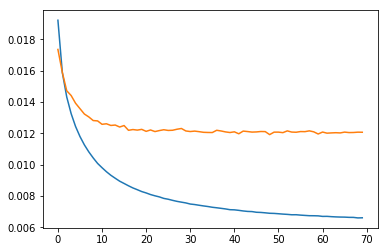

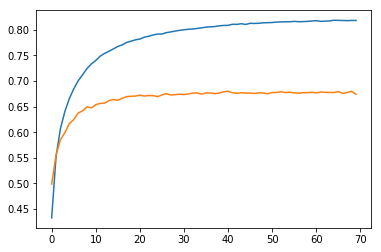

In [ ]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.show()


plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc']) 
plt.show()

## Pruebas grid search

In [ ]:
def create_model(neuronas1 = 25,neuronas2 =25,neuronas3 = 25):
           
    model = Sequential()
    activation='relu'
    init_mode='normal'
    dropout_rate=0.0
    weight_constraint=0
    model.add(Dense(neuronas1, activation=activation, input_dim=374,kernel_initializer=init_mode))
    model.add(Dense(neuronas2, activation=activation,kernel_initializer=init_mode))
    model.add(Dense(neuronas3, activation=activation,kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    model.add(Dense(38,kernel_initializer=init_mode))
    optimizer = RMSprop(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    return model

seed = 7
np.random.seed(seed)
model = KerasClassifier(build_fn=create_model, verbose=1,batch_size=120, epochs = 70)

'print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

In [ ]:
neuronas1 = [25,75,100,150,200,250,300,350,400]
neuronas2 = [25,75,100,150,200,250,300,350,400]
neuronas3 = [25,75,100,150,200,250,300,350,400]
param_grid = dict(neuronas1=neuronas1,neuronas2=neuronas2,neuronas3=neuronas3)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_one_hot, y_train_one_hot)

Epoch 1/70
52693/52693 [==============================] - 5s 89us/step - loss: 0.0226 - acc: 0.2507
Epoch 2/70
52693/52693 [==============================] - 1s 22us/step - loss: 0.0206 - acc: 0.3575
Epoch 3/70
52693/52693 [==============================] - 1s 22us/step - loss: 0.0199 - acc: 0.3892
Epoch 4/70
38760/52693 [=====================>........] - ETA: 0s - loss: 0.0194 - acc: 0.4108

KeyboardInterrupt: 

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.646496 using {'dropout_rate': 0.0, 'weight_constraint': 1}
0.646496 (0.001631) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.642911 (0.001195) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.644884 (0.000436) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.643215 (0.000778) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.638492 (0.001252) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.636310 (0.001195) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.638131 (0.000892) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.638757 (0.000266) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.629387 (0.002087) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.627129 (0.004571) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.629614 (0.000114) with: {'dropout_rate': 0.2, 'weight_constraint': 3}
0.626389 (0.002276) with: {'dropout_rate': 0.2, 'weight_constraint': 4}
0.620149 (0.000057) with: {'dropout_rate': 0.3, 'weight_constraint': 